In [1]:
'''
Library declare
@Author: MinHyung Lee
@Since: 2022/05/22
Used library:
pandas
numpy
featuretools
matplot
sklearn
seaborn

'''

import pandas as pd
import numpy as np
import featuretools as ft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt, log10, ceil
'''
Add plt config
@Author: MinHyung Lee
@Since: 2022/05/24

'''

import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
rcParams['figure.dpi'] = 600

pd.set_option('display.max_rows', 20)

# Set random state for same result
random_state = 7777

In [2]:
#Load preprocessed data and Split into train and test data

X = pd.read_csv("../PreprocessedDataset/preprocessed_feature.csv", index_col=[0])
y = pd.read_csv("../PreprocessedDataset/preprocessed_target.csv", index_col=[0])
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)


In [3]:
# Just predict 100 records
length = 100

domain = np.arange(0, length)
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict((X_test[:length]))
y_predict = reg.predict(X_test)

Text(0.5, 1.0, 'Ground Truth VS Prediction')

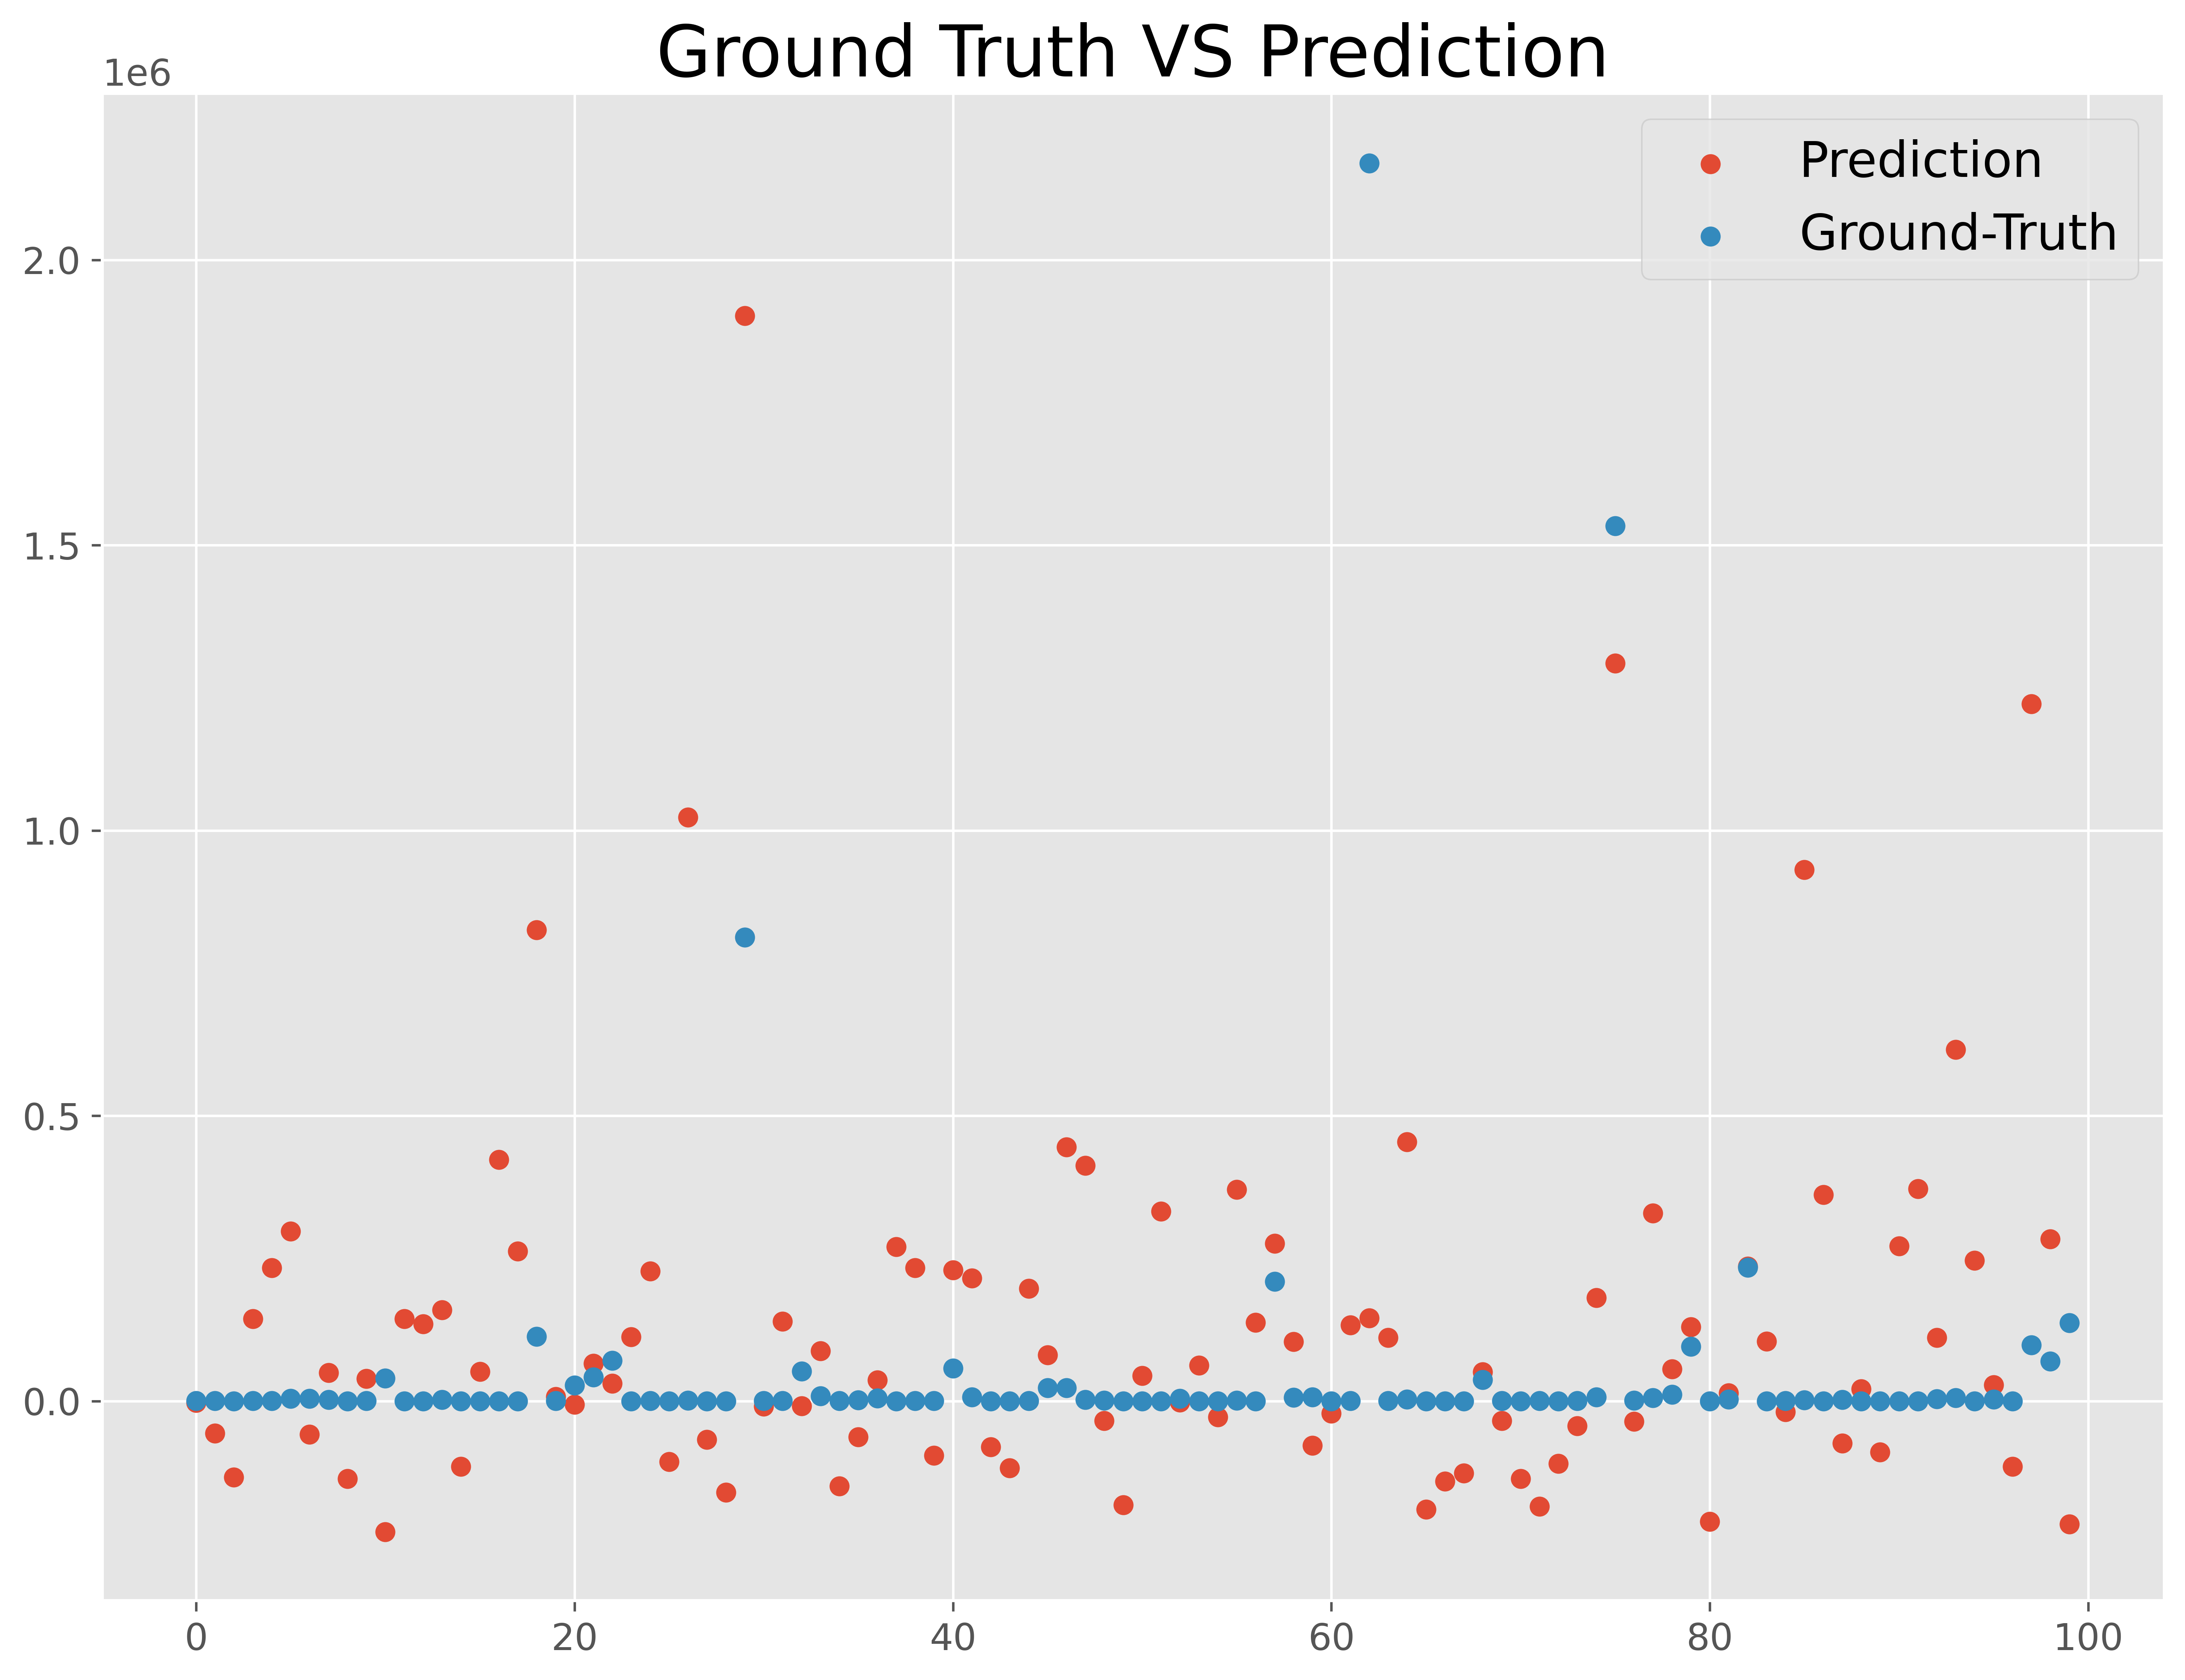

In [4]:
# Plot each point for comparing
plt.scatter(x=domain, y=pred)
plt.scatter(x=domain, y=y_test[:length])
plt.legend(('Prediction','Ground-Truth'))
plt.title("Ground Truth VS Prediction")

In [5]:
#Set Kfold for k == 10
cv = KFold(n_splits=10)

fold = 0
for train_index, test_index in cv.split(X_test):

    '''

    @Author: MinHyung Lee
    @Since: 2022/05/31
    Validate each fold by using linear regression

    '''


    fold += 1
    train_X, test_X = X_train.iloc[train_index], X_test.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_test.iloc[test_index]

    reg.fit(train_X, train_y)

    print(f'Result of {fold} fold')
    print(f'Result => {mean_squared_error(y_test, reg.predict(X_test))}')

Result of 1 fold
Result => 163020414421919.25
Result of 2 fold
Result => 163070571175154.44
Result of 3 fold
Result => 163155660870726.28
Result of 4 fold
Result => 163016208093818.8
Result of 5 fold
Result => 163086762799408.03
Result of 6 fold
Result => 163011091090756.06
Result of 7 fold
Result => 162999062545177.62
Result of 8 fold
Result => 163104188672112.94
Result of 9 fold
Result => 163014648182369.34
Result of 10 fold
Result => 163026609145873.22


In [6]:

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_predict)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_predict)
# MSLE (Mean Squared Log Error)
msle = log10(mse)
# RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_test, y_predict))
# RMSLE (Root Mean Squared Log Error)
rmsle = log10(rmse)




print('MAE (Mean Absolute Error):', mae)
print("---------------")
print("MSE (Mean Squared Error):", mse)
print("MSLE (Mean Squared Log Error):", msle)
print("---------------")
print("RMSE (Root Mean Squared Error):", rmse)
print("RMSLE (Root Mean Squared Log Error):", rmsle)

print("-----score------")
print(reg.score(X_train, y_train))



MAE (Mean Absolute Error): 525558.8851857171
---------------
MSE (Mean Squared Error): 163039999138957.97
MSLE (Mean Squared Log Error): 14.212294164368767
---------------
RMSE (Root Mean Squared Error): 12768711.725893022
RMSLE (Root Mean Squared Log Error): 7.106147082184384
-----score------
0.01470868648442869
